<a href="https://colab.research.google.com/github/SonakshiA/Sentiment-Analysis-using-PSO/blob/main/Fashion_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opendatasets


In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np

In [ ]:
dataset = od.download('https://www.kaggle.com/datasets/whenamancodes/amazon-reviews-on-women-dresses')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sonakshiarora02
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/whenamancodes/amazon-reviews-on-women-dresses


100%|██████████| 2.83M/2.83M [00:00<00:00, 91.2MB/s]

In [ ]:
clothes_reviews = pd.read_csv('dress_dataset/Reviews.csv')
clothes_reviews.head(10)

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1
1,1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1
2,2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0
3,3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1
4,4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1
5,5,43,General,Tops,Sweaters,933,Love the pattern and color,I love this sweater but i'm on the fence about...,0,4,1
6,6,83,General,Tops,Sweaters,937,Beautiful and unique.,Love this sweater!\r\nsoft and cozy and the ru...,4,5,1
7,7,34,General,Tops,Knits,868,Unique and wonderful,The sweater is comfortable and a good weight. ...,2,5,1
8,8,49,General Petite,Tops,Fine gauge,900,Great look all in one,I love everything about this sweater. it is ve...,4,5,1
9,9,49,General,Tops,Knits,873,Beauty meets comfort,"I love this top, the details at the neck and s...",0,5,1


In [ ]:
clothes_reviews.shape

(23486, 11)

In [ ]:
duplicated_count = clothes_reviews.duplicated().sum()
print("Number of duplicate entries: ",duplicated_count)

Number of duplicate entries:  0


In [ ]:
null_values = clothes_reviews.isna().sum()
print("Number of entries with null values: ",null_values)

Number of entries with null values:  s.no                       0
age                        0
division_name             14
department_name           14
class_name                14
clothing_id                0
title                   3810
review_text              845
alike_feedback_count       0
rating                     0
recommend_index            0
dtype: int64


In [ ]:
clothes_reviews.dropna(inplace = True)
clothes_reviews.isna().sum()

s.no                    0
age                     0
division_name           0
department_name         0
class_name              0
clothing_id             0
title                   0
review_text             0
alike_feedback_count    0
rating                  0
recommend_index         0
dtype: int64

In [ ]:
def no_of_words(text):
  words = text.split()
  word_count = len(words)
  return word_count

In [ ]:
clothes_reviews['word_count'] = clothes_reviews['review_text'].apply(no_of_words)

In [ ]:
clothes_reviews.head()

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index,word_count
0,0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1,40
1,1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1,99
2,2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0,38
3,3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1,99
4,4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1,97


**Number of reviews for each rating from 0 to 5**

In [ ]:
print("Number of reviews with rating 0: ",clothes_reviews[clothes_reviews['rating']==0]['review_text'].count())
print("Number of reviews with rating 1: ",clothes_reviews[clothes_reviews['rating']==1]['review_text'].count())
print("Number of reviews with rating 2: ",clothes_reviews[clothes_reviews['rating']==2]['review_text'].count())
print("Number of reviews with rating 3: ",clothes_reviews[clothes_reviews['rating']==3]['review_text'].count())
print("Number of reviews with rating 4: ",clothes_reviews[clothes_reviews['rating']==4]['review_text'].count())
print("Number of reviews with rating 5: ",clothes_reviews[clothes_reviews['rating']==5]['review_text'].count())

Number of reviews with rating 0:  0
Number of reviews with rating 1:  691
Number of reviews with rating 2:  1360
Number of reviews with rating 3:  2464
Number of reviews with rating 4:  4289
Number of reviews with rating 5:  10858


**SENTIMENT ANALYSIS**

**Alloting sentiments based on review/score**


*   0 for review/score 0,1,2 (negative review)
*   1 for review/score 3 (neutral)
*   2 for review/score 4,5 (positive)

In [ ]:
conditions = [(clothes_reviews['rating']<3),(clothes_reviews['rating']==3),(clothes_reviews['rating']>3)]
choice = [0,1,2]
clothes_reviews['sentiment'] = np.select(conditions,choice)

In [ ]:
clothes_reviews.head(10)

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index,word_count,sentiment
0,0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1,40,2
1,1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1,99,2
2,2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0,38,0
3,3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1,99,2
4,4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1,97,2
5,5,43,General,Tops,Sweaters,933,Love the pattern and color,I love this sweater but i'm on the fence about...,0,4,1,99,2
6,6,83,General,Tops,Sweaters,937,Beautiful and unique.,Love this sweater!\r\nsoft and cozy and the ru...,4,5,1,50,2
7,7,34,General,Tops,Knits,868,Unique and wonderful,The sweater is comfortable and a good weight. ...,2,5,1,26,2
8,8,49,General Petite,Tops,Fine gauge,900,Great look all in one,I love everything about this sweater. it is ve...,4,5,1,93,2
9,9,49,General,Tops,Knits,873,Beauty meets comfort,"I love this top, the details at the neck and s...",0,5,1,79,2


**Pie Chart for Sentiment Distribution**

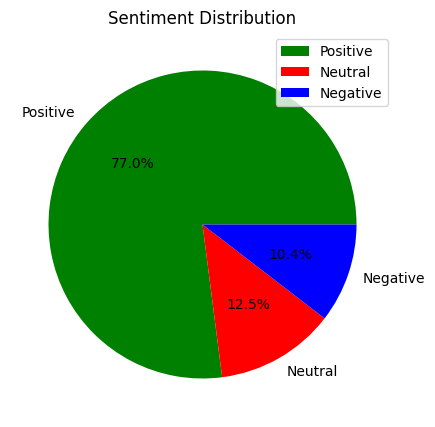

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
sizes = clothes_reviews['sentiment'].value_counts()
labels = ['Positive', 'Neutral', 'Negative']
colors=['green','red','blue']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',colors = colors)
plt.title('Sentiment Distribution')
plt.legend()
plt.show()

**Text Preprocessing**

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud

In [ ]:
def data_processing(text):
  text = text.lower()
  text = re.sub(r'http\S+','', text)
  text = re.sub(r'@\w+|#','', text) #removing hashtags and @ symbol
  text = re.sub(r'[^\w\s]','',text) #removing punctuations
  #removing the stop words
  text_tokens = word_tokenize(text)
  filtered_text = [w for w in text_tokens if not w in stop_words]
  return " ".join(filtered_text)

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
clothes_reviews['review_text'] = clothes_reviews['review_text'].apply(data_processing)

**Stemming**

In [ ]:
stemmer = PorterStemmer()
def stemming(data):
  text = [stemmer.stem(word) for word in data]
  return data

In [ ]:
clothes_reviews['review_text'] = clothes_reviews['review_text'].apply(stemming)

**Visualizing Positive Reviews and Creating a WordCloud**

In [ ]:
pos_reviews = clothes_reviews[clothes_reviews.sentiment==2]
pos_reviews.head()

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index,word_count,sentiment
0,0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,like reviewers hesitant spend much pair jeans ...,0,5,1,40,2
1,1,62,General Petite,Tops,Blouses,850,Lovely and unique!,true bunch fall clothing photos colors totally...,12,5,1,99,2
3,3,45,General Petite,Bottoms,Pants,1068,Wow,love love hesitant buy first reviews made seem...,0,5,1,99,2
4,4,37,Initmates,Intimate,Swim,24,Great for bigger busts,absolutely love retro look swimsuit first saw ...,0,5,1,97,2
5,5,43,General,Tops,Sweaters,933,Love the pattern and color,love sweater im fence keeping havent figured w...,0,4,1,99,2


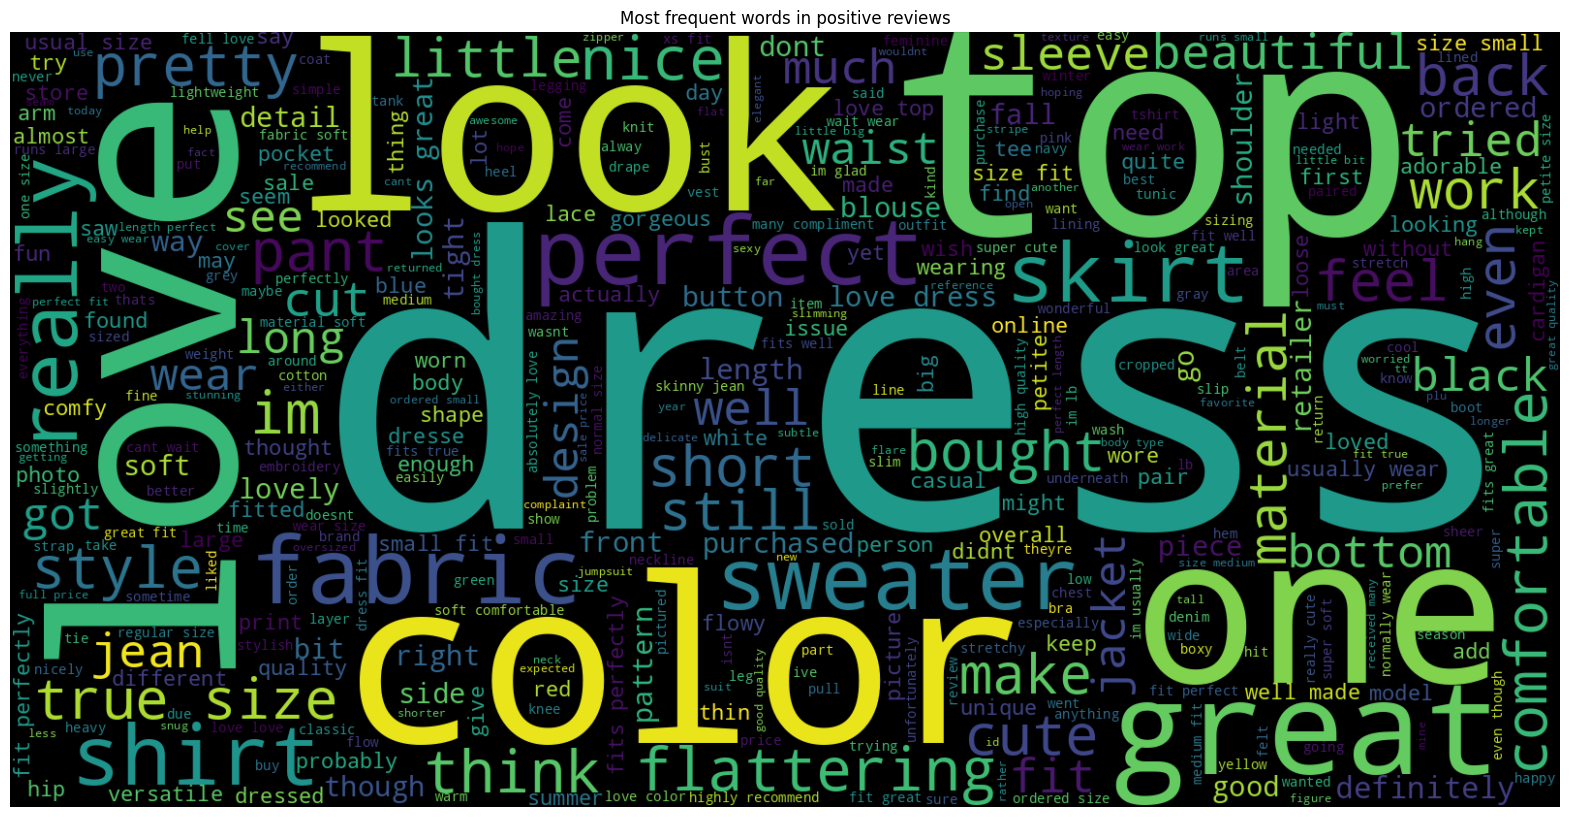

In [ ]:
text = ' '.join([word for word in pos_reviews['review_text']])
plt.figure(figsize=(20,15),facecolor = None)
wordcloud = WordCloud(max_words=400,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews')
plt.show()

In [ ]:
from collections import Counter
count = Counter()
for text in pos_reviews['review_text']:
  for word in text.split():
    count[word] +=1
count.most_common(15)

[('dress', 7039),
 ('love', 6646),
 ('size', 6277),
 ('fit', 5010),
 ('wear', 4799),
 ('top', 4731),
 ('great', 4670),
 ('like', 4310),
 ('im', 4197),
 ('color', 3187),
 ('perfect', 3074),
 ('small', 2980),
 ('would', 2978),
 ('fabric', 2913),
 ('little', 2866)]

In [ ]:
pos_words = pd.DataFrame(count.most_common(15)) #creating a dataframe of positive reviews
pos_words.columns = ['Word','Count']
pos_words.head()

,Word,Count
0,dress,7039
1,love,6646
2,size,6277
3,fit,5010
4,wear,4799


In [ ]:
import plotly.express as px
px.bar(pos_words,x='Count',y='Word',title='Common words in positive reviews',color='Word')

**Visualizing Negative Reviews and Creating a WordCloud**

In [ ]:
neg_reviews = clothes_reviews[clothes_reviews.sentiment==0]
neg_reviews.head()

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index,word_count,sentiment
2,2,47,General Petite,Bottoms,Skirts,993,Meh,wanted skirt work love design way way long 5 5...,3,1,0,38,0
13,13,23,General,Bottoms,Skirts,1020,"Cute, but not flattering on",really loved skirt model wasnt flattering rece...,0,2,0,76,0
32,32,56,General Petite,Tops,Knits,884,Top part is gorgeous; bottom part is not,favorite colors purple green store saw beautif...,4,2,0,95,0
46,46,32,General,Tops,Blouses,850,Awful fit,wanted like top looks terrible lay right bust ...,0,2,0,49,0
47,47,66,General Petite,Tops,Blouses,820,Too bad,cant get past different blouse got photo mine ...,4,2,0,100,0


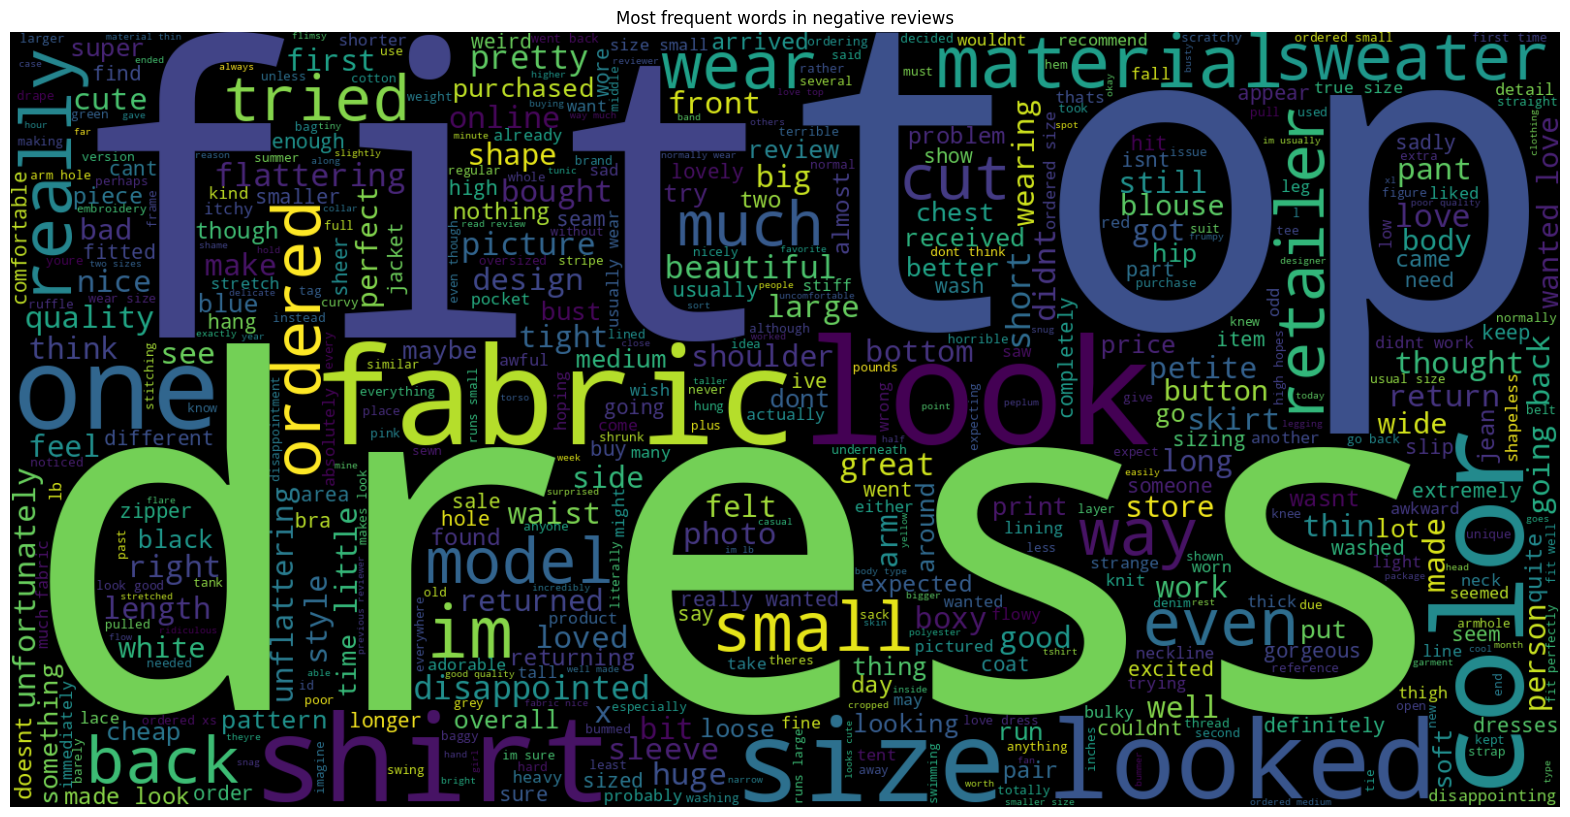

In [ ]:
text = ' '.join([word for word in neg_reviews['review_text']])
plt.figure(figsize=(20,15),facecolor = None)
wordcloud = WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative reviews')
plt.show()

In [ ]:
from collections import Counter
count = Counter()
for text in neg_reviews['review_text']:
  for word in text.split():
    count[word] +=1
count.most_common(15)

[('dress', 976),
 ('like', 927),
 ('top', 730),
 ('would', 633),
 ('fabric', 625),
 ('fit', 608),
 ('size', 600),
 ('back', 517),
 ('ordered', 466),
 ('look', 465),
 ('small', 445),
 ('im', 435),
 ('really', 415),
 ('love', 398),
 ('wear', 377)]

In [ ]:
neg_words = pd.DataFrame(count.most_common(15)) #creating a dataframe of positive reviews
neg_words.columns = ['Word','Count']
neg_words.head()

,Word,Count
0,dress,976
1,like,927
2,top,730
3,would,633
4,fabric,625


In [ ]:
px.bar(neg_words,x='Count',y='Word',title='Common words in positive reviews',color='Word')

**Visualizing Neutral Reviews**

In [ ]:
neutral_reviews = clothes_reviews[clothes_reviews.sentiment==1]
neutral_reviews.head()

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index,word_count,sentiment
15,15,31,General,Dresses,Dresses,1086,Not for my curves,57 34c 28 jeans size 4 dress fell love pattern...,5,3,0,92,1
16,16,64,General,Tops,Sweaters,939,Itchy!,love idea coat foolishly purchased items happy...,22,3,0,93,1
26,26,49,General Petite,Dresses,Dresses,1078,Tent-like but cozy,tried store fit like tent doesnt help im 51 st...,4,3,0,104,1
29,29,44,General,Tops,Knits,879,Disappointed,wanted love top huge didnt like material felt ...,3,3,0,28,1
38,38,30,General Petite,Tops,Blouses,838,Weird arms!,shirt great except arms band around arms tight...,0,3,0,35,1


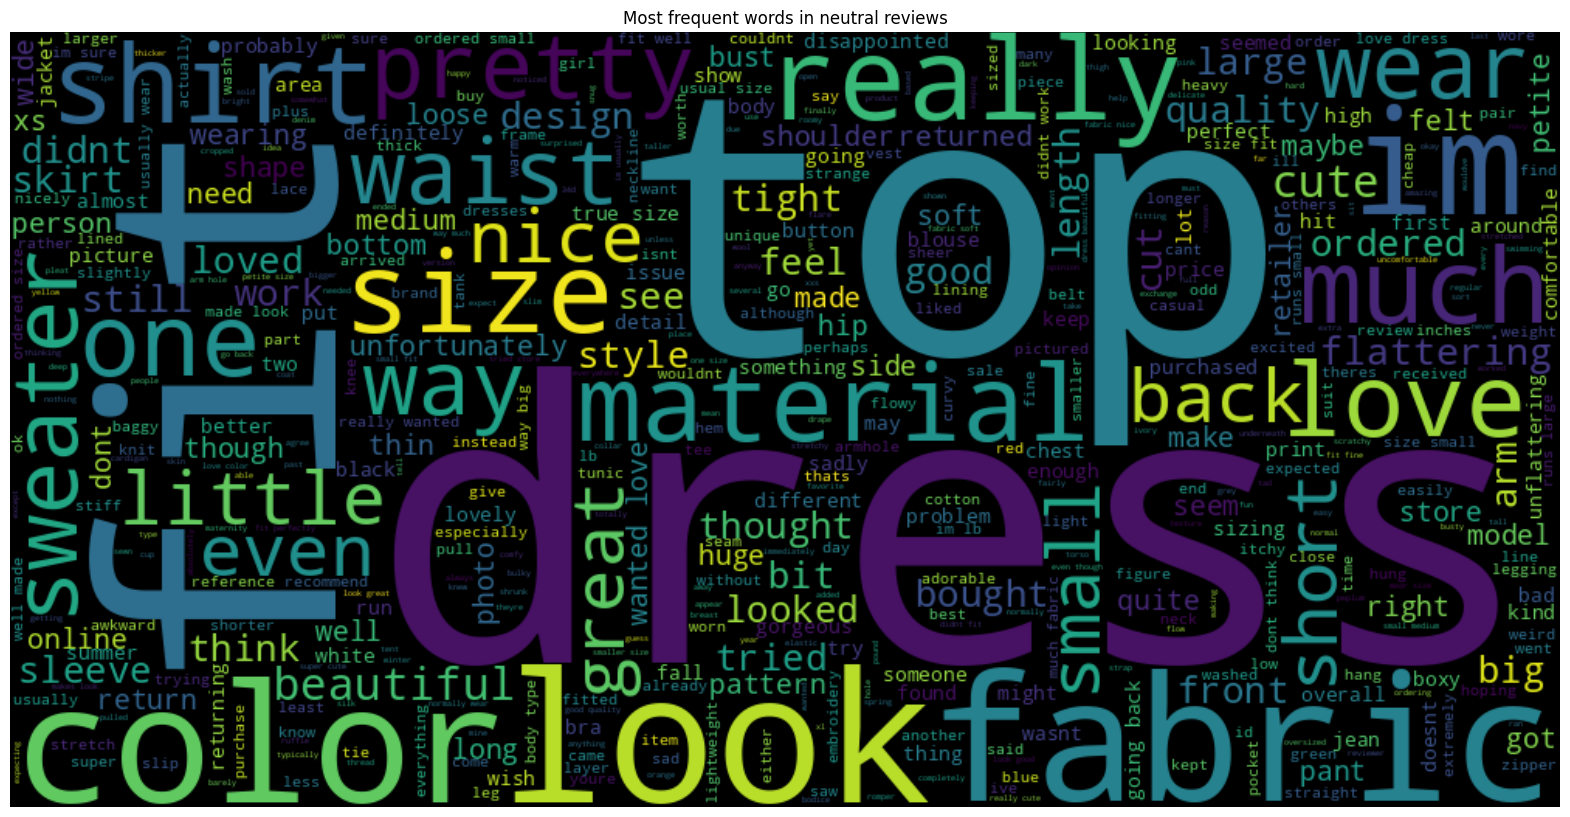

In [ ]:
text = ' '.join([word for word in neutral_reviews['review_text']])
plt.figure(figsize=(20,15),facecolor = None)
wordcloud = WordCloud(max_words=500,width=1000,height=500).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in neutral reviews')
plt.show()

In [ ]:
from collections import Counter
count = Counter()
for text in neutral_reviews['review_text']:
  for word in text.split():
    count[word] +=1
count.most_common(15)

[('dress', 1251),
 ('top', 1024),
 ('like', 1011),
 ('size', 914),
 ('fit', 910),
 ('would', 858),
 ('fabric', 737),
 ('im', 700),
 ('love', 654),
 ('look', 608),
 ('small', 591),
 ('really', 577),
 ('back', 543),
 ('color', 540),
 ('wear', 523)]

In [ ]:
neutral_words = pd.DataFrame(count.most_common(15)) #creating a dataframe of positive reviews
neutral_words.columns = ['Word','Count']
neutral_words.head()

,Word,Count
0,dress,1251
1,top,1024
2,like,1011
3,size,914
4,fit,910


In [ ]:
px.bar(neutral_words,x='Count',y='Word',title='Common words in neutral reviews',color='Word')

In [ ]:
reviews_df = clothes_reviews[['review_text', 'sentiment']]
reviews_df.head()

,review_text,sentiment
0,like reviewers hesitant spend much pair jeans ...,2
1,true bunch fall clothing photos colors totally...,2
2,wanted skirt work love design way way long 5 5...,0
3,love love hesitant buy first reviews made seem...,2
4,absolutely love retro look swimsuit first saw ...,2


In [ ]:
x = reviews_df.drop(['sentiment'], axis=1)
y = reviews_df['sentiment']

In [ ]:
print(x.shape)
print(y.shape)


(10227, 1)
(10227,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer() #Read more about TF-IDF
x = vect.fit_transform(clothes_reviews['review_text'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state =0)

In [ ]:
print("Size of x_train: ",x_train.shape)
print("Size of x_test: ",x_test.shape)
print("Size of y_train: ",y_train.shape)
print("Size of y_test: ",y_test.shape)

Size of x_train:  (13763, 18206)
Size of x_test:  (5899, 18206)
Size of y_train:  (13763,)
Size of y_test:  (5899,)


In [ ]:
pip install pyswarms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 2.5 MB/s eta 0:00:00


In [ ]:
from pyswarms.single.global_best import GlobalBestPSO
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
def fitness_function(params):
  for i in range(len(params)):
    print(params)
    C,gamma = params[i]
    svm_model = SVC(C=C,gamma=gamma)
    svm_model.fit(x_train,y_train)
    y_pred = svm_model.predict(x_test)
    accuracy = accuracy_score(y_pred,y_test)
  return -accuracy

In [ ]:
options = {'c1':0.5, 'c2':0.3,'w':0.9}
bounds = ([0.1,0.1],[100,1])
optimizer = GlobalBestPSO(n_particles=10,dimensions=2,options=options,bounds=bounds)
best_params, best_fitness = optimizer.optimize(fitness_function, iters=5)
print("Best parameters found (C,gamma)",best_params)

2024-05-09 19:54:52,037 - pyswarms.single.global_best - INFO - Optimize for 5 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/5

[[73.50718952  0.17800804]
 [83.01499104  0.73655779]
 [23.5284752   0.66907051]
 [67.62737908  0.41735986]
 [69.55717613  0.27055039]
 [25.57636597  0.92428814]
 [84.44126237  0.65836785]
 [12.3015348   0.57190741]
 [98.19164878  0.33397505]
 [48.43423186  0.21145995]]
[[73.50718952  0.17800804]
 [83.01499104  0.73655779]
 [23.5284752   0.66907051]
 [67.62737908  0.41735986]
 [69.55717613  0.27055039]
 [25.57636597  0.92428814]
 [84.44126237  0.65836785]
 [12.3015348   0.57190741]
 [98.19164878  0.33397505]
 [48.43423186  0.21145995]]
[[73.50718952  0.17800804]
 [83.01499104  0.73655779]
 [23.5284752   0.66907051]
 [67.62737908  0.41735986]
 [69.55717613  0.27055039]
 [25.57636597  0.92428814]
 [84.44126237  0.65836785]
 [12.3015348   0.57190741]
 [98.19164878  0.33397505]
 [48.43423186  0.21145995]]
[[73.50718952  0.17800804]
 [83.01499104  0.73655779]
 [23.5284752   0.66907051]
 [67.62737908  0.41735986]
 [69.55717613  0.27055039]
 [25.57636597  0.92428814]
 [84.44126237  0.65836785

pyswarms.single.global_best:  20%|██        |1/5, best_cost=-0.81

[[74.02146506  0.16299575]
 [81.67880308  0.37514992]
 [28.8297846   0.81369461]
 [69.69735053  0.13420473]
 [70.52997671  0.29038155]
 [35.06222031  0.7481676 ]
 [82.48706807  0.27589582]
 [13.39535752  0.21677236]
 [91.97168347  0.60493702]
 [49.25762137  0.72538803]]
[[74.02146506  0.16299575]
 [81.67880308  0.37514992]
 [28.8297846   0.81369461]
 [69.69735053  0.13420473]
 [70.52997671  0.29038155]
 [35.06222031  0.7481676 ]
 [82.48706807  0.27589582]
 [13.39535752  0.21677236]
 [91.97168347  0.60493702]
 [49.25762137  0.72538803]]
[[74.02146506  0.16299575]
 [81.67880308  0.37514992]
 [28.8297846   0.81369461]
 [69.69735053  0.13420473]
 [70.52997671  0.29038155]
 [35.06222031  0.7481676 ]
 [82.48706807  0.27589582]
 [13.39535752  0.21677236]
 [91.97168347  0.60493702]
 [49.25762137  0.72538803]]
[[74.02146506  0.16299575]
 [81.67880308  0.37514992]
 [28.8297846   0.81369461]
 [69.69735053  0.13420473]
 [70.52997671  0.29038155]
 [35.06222031  0.7481676 ]
 [82.48706807  0.27589582

pyswarms.single.global_best:  40%|████      |2/5, best_cost=-0.824

[[74.48431305  0.95948469]
 [78.62799514  0.82946789]
 [45.07703551  0.75235475]
 [72.50784041  0.69735577]
 [72.25220021  0.28339816]
 [45.96376921  0.54700063]
 [78.71000119  0.72634007]
 [19.17017528  0.69603301]
 [82.25026472  0.7860416 ]
 [55.50170114  0.27728784]]
[[74.48431305  0.95948469]
 [78.62799514  0.82946789]
 [45.07703551  0.75235475]
 [72.50784041  0.69735577]
 [72.25220021  0.28339816]
 [45.96376921  0.54700063]
 [78.71000119  0.72634007]
 [19.17017528  0.69603301]
 [82.25026472  0.7860416 ]
 [55.50170114  0.27728784]]
[[74.48431305  0.95948469]
 [78.62799514  0.82946789]
 [45.07703551  0.75235475]
 [72.50784041  0.69735577]
 [72.25220021  0.28339816]
 [45.96376921  0.54700063]
 [78.71000119  0.72634007]
 [19.17017528  0.69603301]
 [82.25026472  0.7860416 ]
 [55.50170114  0.27728784]]
[[74.48431305  0.95948469]
 [78.62799514  0.82946789]
 [45.07703551  0.75235475]
 [72.50784041  0.69735577]
 [72.25220021  0.28339816]
 [45.96376921  0.54700063]
 [78.71000119  0.72634007

pyswarms.single.global_best:  60%|██████    |3/5, best_cost=-0.824

[[74.67409975  0.17655874]
 [76.00537813  0.97345878]
 [61.60200333  0.64824026]
 [75.02310991  0.93676241]
 [73.35310854  0.27425623]
 [53.37339364  0.32957429]
 [75.52405246  0.94999101]
 [38.40831163  0.14931904]
 [74.59734479  0.91894178]
 [59.98655454  0.80233806]]
[[74.67409975  0.17655874]
 [76.00537813  0.97345878]
 [61.60200333  0.64824026]
 [75.02310991  0.93676241]
 [73.35310854  0.27425623]
 [53.37339364  0.32957429]
 [75.52405246  0.94999101]
 [38.40831163  0.14931904]
 [74.59734479  0.91894178]
 [59.98655454  0.80233806]]
[[74.67409975  0.17655874]
 [76.00537813  0.97345878]
 [61.60200333  0.64824026]
 [75.02310991  0.93676241]
 [73.35310854  0.27425623]
 [53.37339364  0.32957429]
 [75.52405246  0.94999101]
 [38.40831163  0.14931904]
 [74.59734479  0.91894178]
 [59.98655454  0.80233806]]
[[74.67409975  0.17655874]
 [76.00537813  0.97345878]
 [61.60200333  0.64824026]
 [75.02310991  0.93676241]
 [73.35310854  0.27425623]
 [53.37339364  0.32957429]
 [75.52405246  0.94999101

pyswarms.single.global_best:  80%|████████  |4/5, best_cost=-0.825

[[74.84490778  0.28192538]
 [73.50568942  0.87293407]
 [79.40717821  0.51418745]
 [77.1983904   0.96195337]
 [74.67826533  0.26490008]
 [60.44833962  0.12025885]
 [72.40262191  0.15191527]
 [57.55098084  0.47350428]
 [67.71366157  0.86281961]
 [65.7263696   0.36391735]]
[[74.84490778  0.28192538]
 [73.50568942  0.87293407]
 [79.40717821  0.51418745]
 [77.1983904   0.96195337]
 [74.67826533  0.26490008]
 [60.44833962  0.12025885]
 [72.40262191  0.15191527]
 [57.55098084  0.47350428]
 [67.71366157  0.86281961]
 [65.7263696   0.36391735]]
[[74.84490778  0.28192538]
 [73.50568942  0.87293407]
 [79.40717821  0.51418745]
 [77.1983904   0.96195337]
 [74.67826533  0.26490008]
 [60.44833962  0.12025885]
 [72.40262191  0.15191527]
 [57.55098084  0.47350428]
 [67.71366157  0.86281961]
 [65.7263696   0.36391735]]
[[74.84490778  0.28192538]
 [73.50568942  0.87293407]
 [79.40717821  0.51418745]
 [77.1983904   0.96195337]
 [74.67826533  0.26490008]
 [60.44833962  0.12025885]
 [72.40262191  0.15191527

pyswarms.single.global_best: 100%|██████████|5/5, best_cost=-0.825
2024-05-09 22:01:13,895 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.8252246143414138, best pos: [74.67409975  0.17655874]


Best parameters found (C,gamma) -0.8252246143414138


In [ ]:
svm_model = SVC(C=best_fitness[0],gamma=best_fitness[1])
svm_model.fit(x_train,y_train)
y_pred = svm_model.predict(x_test)
accuracy = accuracy_score(y_pred,y_test)
print("Accuracy: ",accuracy*100)

Accuracy:  80.74249872859806


**Creating ML Models**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred,y_test)
print(logreg_acc*100)

82.23427699610103


In [ ]:
svc = LinearSVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred,y_test)
print(svc_acc*100)

82.04780471266317


In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train,y_train)
nb_pred = nb.predict(x_test)
nb_acc = accuracy_score(nb_pred,y_test)
print(nb_acc*100)

77.08086116290896


In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)
dt_pred = decision_tree.predict(x_test)
dt_acc = accuracy_score(dt_pred,y_test)
print(dt_acc*100)

73.91083234446516


In [ ]:
from sklearn.ensemble import BaggingClassifier
bagging_classifier = BaggingClassifier(base_estimator=decision_tree)
bagging_classifier.fit(x_train, y_train)
bagg_pred = bagging_classifier.predict(x_test)
bagg_acc = accuracy_score(bagg_pred, y_test)
print(bagg_acc*100)

78.58959145617901


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
naive_bayes_model = MultinomialNB()
svm_model = SVC()

stacking_model = StackingClassifier(estimators = [('nb',naive_bayes_model),('svm',svm_model)], final_estimator = SVC())
stacking_model.fit(x_train,y_train)
predictions = stacking_model.predict(x_test)
accuracy = accuracy_score(predictions,y_test)
print("Accuracy: ",accuracy*100)

Accuracy:  81.59010001695202


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
naive_bayes_model = MultinomialNB()
svm_model = LinearSVC()

stacking_model = StackingClassifier(estimators = [('nb',naive_bayes_model),('svm',svm_model)], final_estimator = LinearSVC())
stacking_model.fit(x_train,y_train)
predictions = stacking_model.predict(x_test)
accuracy = accuracy_score(predictions,y_test)
print("Accuracy: ",accuracy*100)

Accuracy:  82.13256484149855


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
naive_bayes_model = MultinomialNB()
svm_model = SVC(probability = True)

voting_model = VotingClassifier(estimators = [('nb',naive_bayes_model),('svm',svm_model)], voting = 'soft')
voting_model.fit(x_train,y_train)
predictions = voting_model.predict(x_test)
accuracy = accuracy_score(predictions,y_test)
print("Accuracy: ",accuracy*100)

Accuracy:  77.77589421935922


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
naive_bayes_model = MultinomialNB()
lr_model = LogisticRegression()

stacking_model = StackingClassifier(estimators = [('nb',naive_bayes_model),('lr',lr_model)], final_estimator = LogisticRegression())
stacking_model.fit(x_train,y_train)
predictions = voting_model.predict(x_test)
accuracy = accuracy_score(predictions,y_test)
print("Accuracy: ",accuracy*100)

Accuracy:  77.77589421935922


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
svm_model = SVC()
lr_model = LogisticRegression()

stacking_model = StackingClassifier(estimators = [('svm',svm_model),('lr',lr_model)], final_estimator = LogisticRegression())
stacking_model.fit(x_train,y_train)
predictions = voting_model.predict(x_test)
accuracy = accuracy_score(predictions,y_test)
print("Accuracy: ",accuracy*100)

Accuracy:  77.77589421935922


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
svm_model = LinearSVC()
lr_model = LogisticRegression()

stacking_model = StackingClassifier(estimators = [('svm',svm_model),('lr',lr_model)], final_estimator = LinearSVC())
stacking_model.fit(x_train,y_train)
predictions = voting_model.predict(x_test)
accuracy = accuracy_score(predictions,y_test)
print("Accuracy: ",accuracy*100)

Accuracy:  77.77589421935922


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
naive_bayes_model = MultinomialNB()
svm_model = LinearSVC(C = best_fitness[1])
stacking_model = StackingClassifier(estimators = [('nb',naive_bayes_model),('svm',svm_model)], final_estimator = LinearSVC())
stacking_model.fit(x_train,y_train)
predictions = stacking_model.predict(x_test)
accuracy = accuracy_score(predictions,y_test)
print("Accuracy: ",accuracy*100)

Accuracy:  82.60722156297678


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
naive_bayes_model = MultinomialNB()
svm_model = LinearSVC()
stacking_model = StackingClassifier(estimators = [('nb',naive_bayes_model),('svm',svm_model)], final_estimator = LinearSVC())
stacking_model.fit(x_train,y_train)
predictions = stacking_model.predict(x_test)
accuracy = accuracy_score(predictions,y_test)
print("Accuracy: ",accuracy*100)

Accuracy:  82.13256484149855
